# Supervised segmentation and tree-structured models
Data Mining for Business Analytics

Robert Moakler, Spring 2016
***

Before we get started, I am going to `import` some Python packages that I will use for this Hands-on demonstration. I have removed a lot of the code that is not necessary for you to know and put it into something called `dmba`. This means that anything starting with `dmba` will be something I wrote but understanding the code behind it is not needed. If you like to look at stuff like this, feel free to look inside of the `moakler` folder!

In [1]:
# Import our custom functions to do some cool Hand-on stuff
from moakler import dmba

# Import pandas to read in data
import pandas as pd

# Import packages to plot
import matplotlib.pylab as plt
%matplotlib inline

## Data
We need to look at some data, so let's read in the data set that is located in `data/success.csv`. There are 500 records and three features. Two decimal numbers: number_of_pets and age and a binary (0 or 1) columns called success.

In [2]:
data = pd.read_csv("data/success.csv")

We can (and should) take a look at the first few rows/records of our data to see what we are dealing with.

In [3]:
data.head()

,number_of_pets,age,success
0,2.231325,33.381085,0
1,2.887068,60.842598,0
2,1.561442,42.185568,0
3,2.582855,69.651130,0
4,2.443729,55.586017,0


Let's define a very important business problem. In this example I would like to use `number_of_pets` and `age` to predict whether or not someone will be successful. Like we discussed last week, we will often separate the features used for prediction from the target variable. Often, we call the features **`X`** and the target variable **`Y`**. There is no real reason for this, but it is very common.

In [4]:
Y = data['success']
X = data.drop(['success'], 1) # this will drop the column success
                              # the column name must be in [] and you must have a 1

Let's take one more look at our nicely separated data.

In [5]:
X.head()

,number_of_pets,age
0,2.231325,33.381085
1,2.887068,60.842598
2,1.561442,42.185568
3,2.582855,69.651130
4,2.443729,55.586017


In [6]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: success, dtype: int64

## Feature segmentation
Let's look at one of our features, in this case `number_of_pets` and try to figure out where the best split should be to create pure groups. To visualize this, I will plot the points on a number line. Red dots mean unsuccessful people and blue dots mean successful people. The vertical position here doesn't mean anything.

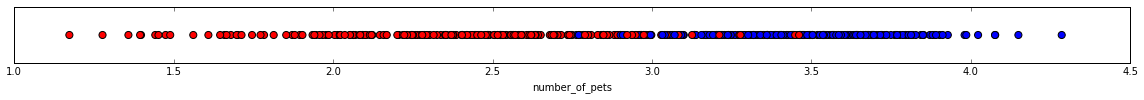

In [7]:
dmba.single_feature_plot(X, Y, 'number_of_pets')

Where do you think the best split should be?

In [8]:
dmba.information_gain(X, Y, 'number_of_pets', threshold=2.5)

0.29561751138692149

Let's go through all possible splits and find the best one.

In [9]:
dmba.get_highest_ig(X, Y, 'number_of_pets')

'The maximum IG of 0.603382835777 was found when number_of_pets = 3.03257229168'

## Building a tree
Instead of going through each group and manually calculating the information gain, we will just ask Python to do it. We simply need to tell the tree to use "entropy" since that's what we've been talking about. As we saw in the slides, we can also change the max depth of the tree so that it doesn't get too tall.

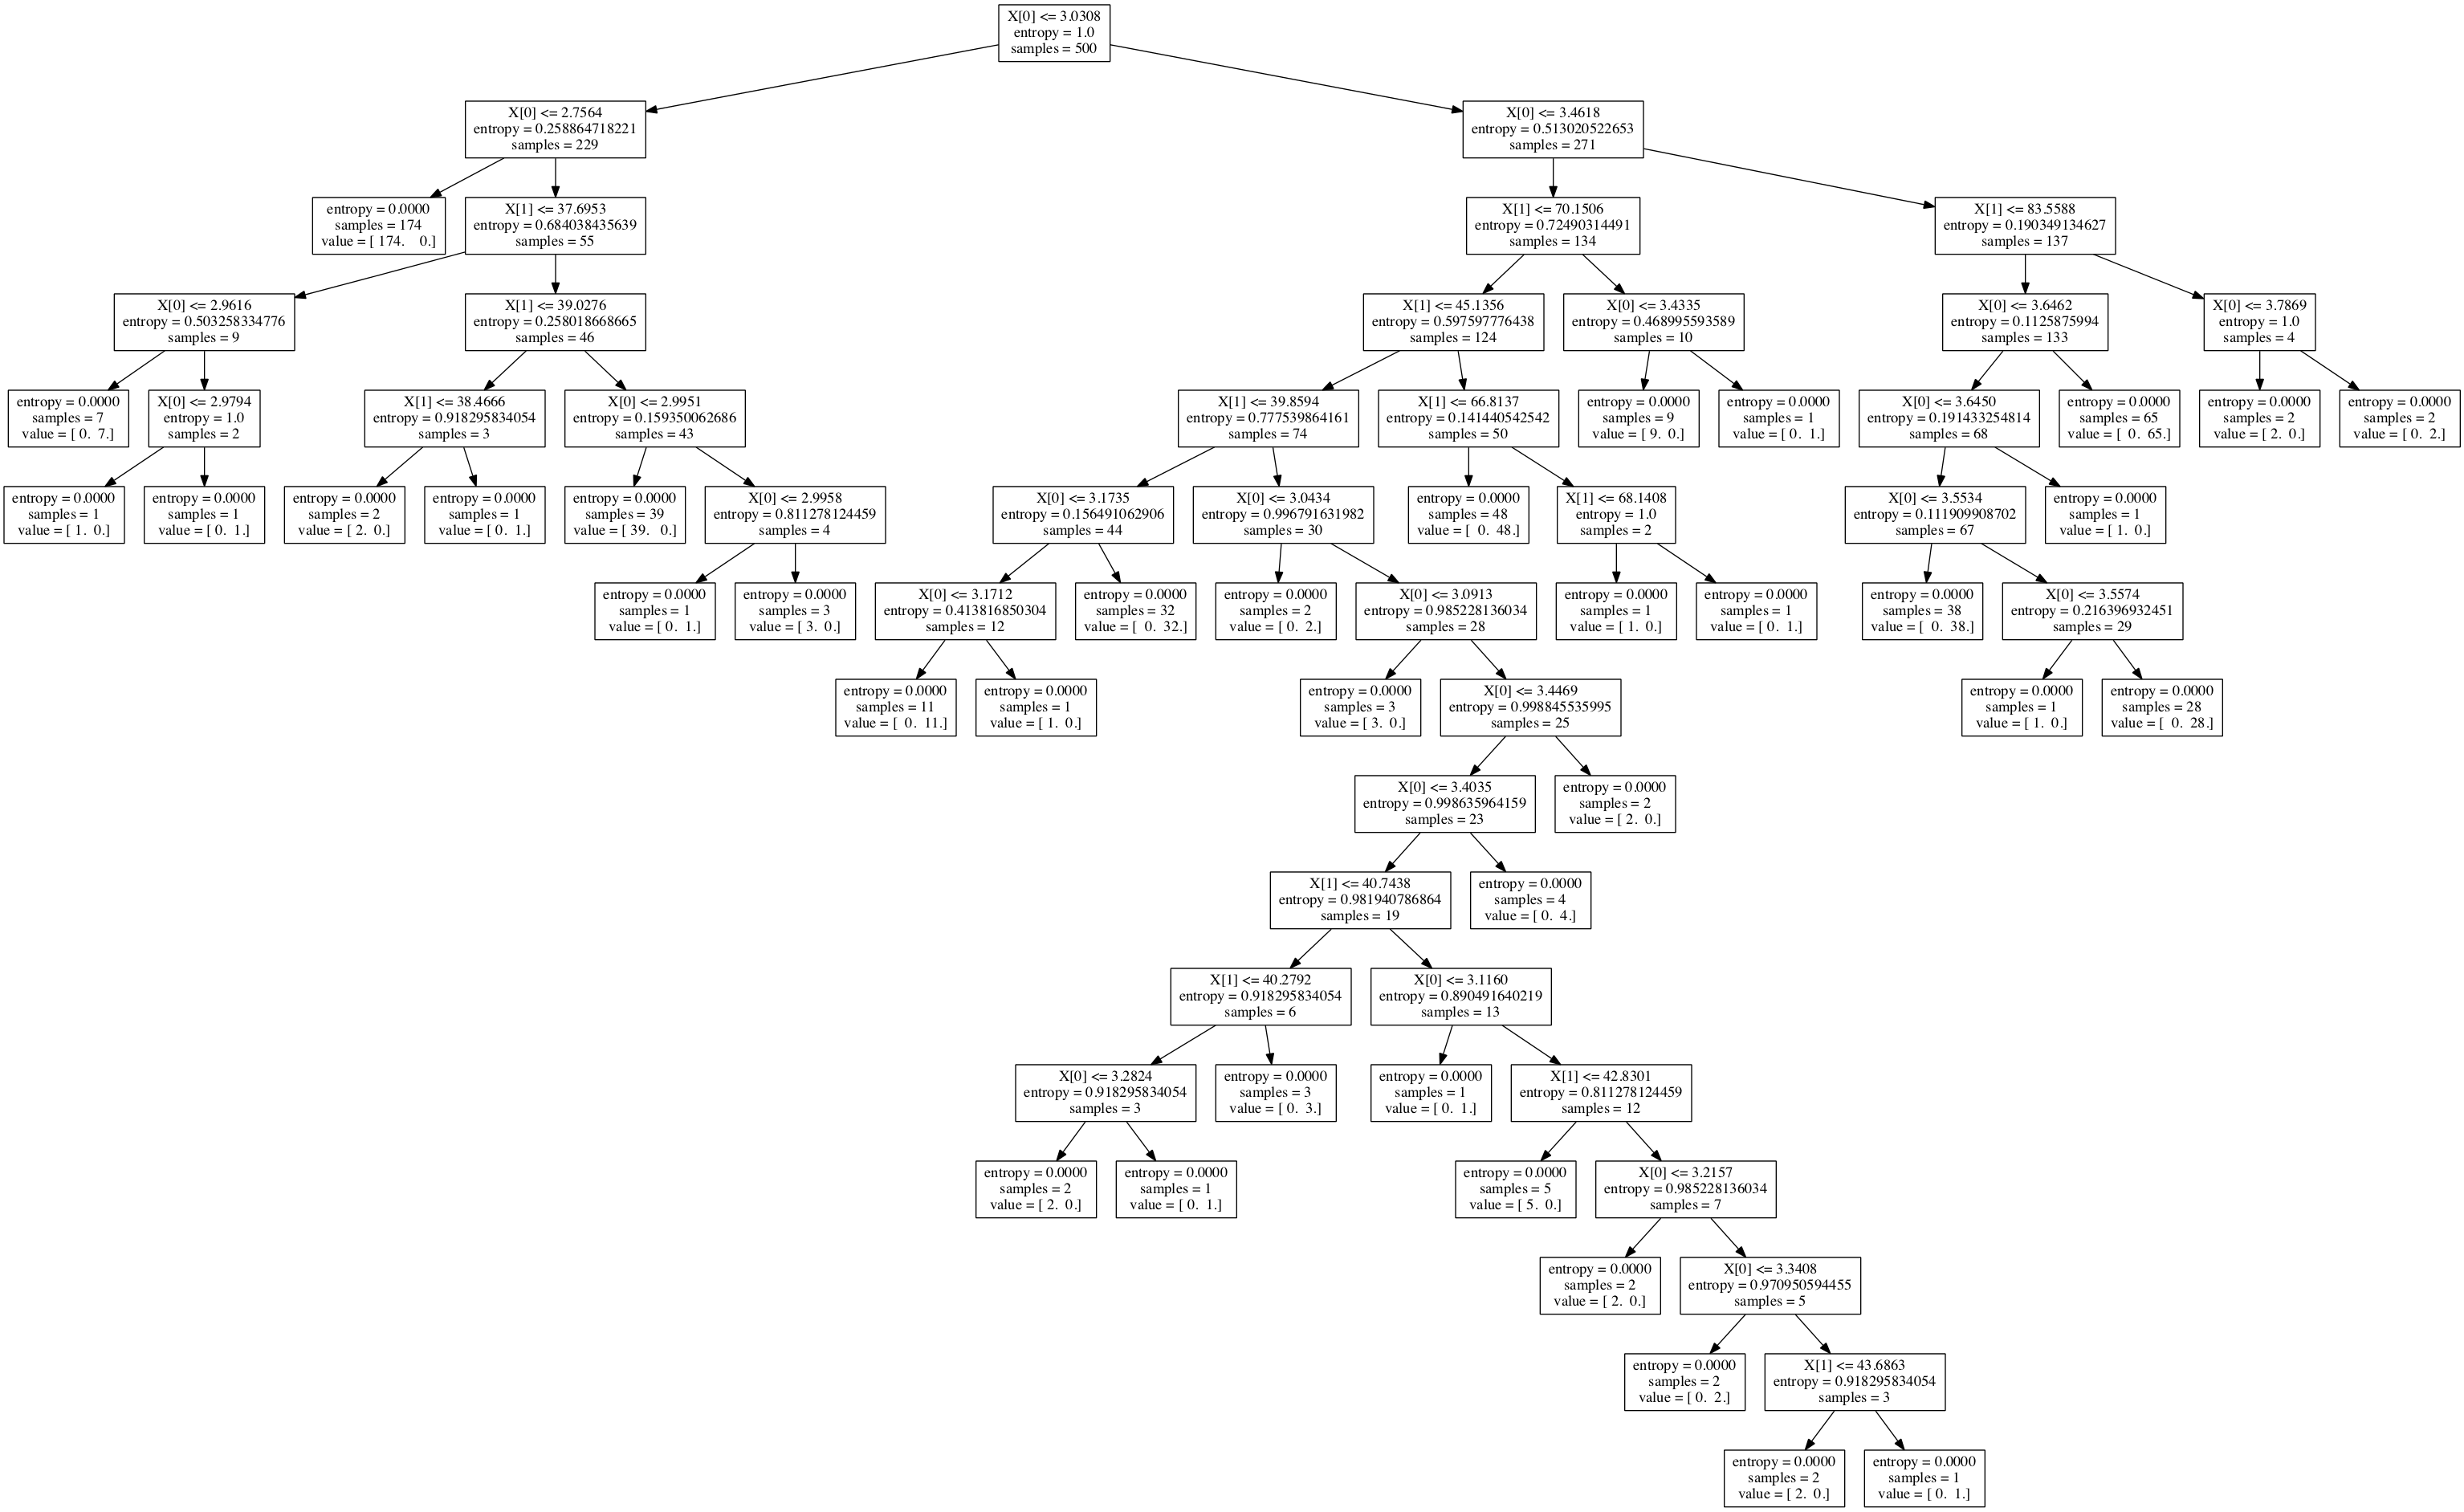

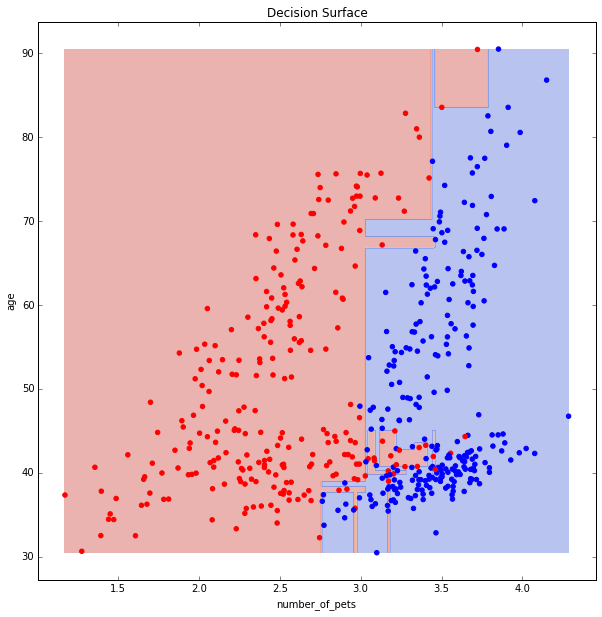

Accuracy = 1.0


In [13]:
# Import decision tree related things
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Tell Python what type of model we are interested in building
tree = DecisionTreeClassifier(criterion='entropy')

# Now you should build (also called train or fit) the model
tree = tree.fit(X, Y)

# Since it is a tree, we can use this thing I wrote to look at the tree
dmba.print_tree(tree)

# We can also use something else I wrote to look at the decision surface
dmba.decision_surface(X, Y, tree)

# Check to see how accurate our tree is using accuracy
accuracy = accuracy_score(tree.predict(X), Y)
print "Accuracy = " + str(accuracy)

## Team work
I would like you to try and answer this question with your closest 2 or 3 neighbors. Work in groups and try to find a solution. While discussing, try to ensure everyone knows why you are taking the approach that you are taking.

Try a few different values of `max_depth` and find out which one gives you the best accuracy. To do this
- loop through values from `max_depth`, maybe the numbers 1 through 20
- for each value, tell Python to make a tree with that max depth
- for each value's tree, fit/train/build your tree with all of our `X` and `Y` data
- for each fitted tree, find the accuracy
- keep track of all accuracies for each max depth (maybe in a list)

Now, to visualize how you are doing, create a plot of accuracies. On the x-axis put the values of `max_depth` you tried (i.e., the numbers 1 through 20). On the y-axis put your accuracy.

In [ ]:
# I'll start you off with some helpful skeleton code

max_depths = range(1,20)
accuracies = []

for md in max_depths:
    # Tell Python what type of model we are interested in building
    
    # Now you should build (also called train or fit) the model
    
    # Check to see how accurate our tree is using accuracy

plt.plot(<list_of_x_values>, <list_of_y_values>)
plt.xlabel("Label of x-axis")
plt.ylabel("Label of y-axis")
plt.show()